In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
original_data = pd.read_csv('heart.csv')
original_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
print(f'Shape: {original_data.shape}')
print(original_data.isnull().sum())

Shape: (303, 14)
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [15]:
old = original_data[['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak']]
cp_dummies = pd.get_dummies(original_data['cp'], prefix='cp').iloc[:, 1:]
restecg_dummies = pd.get_dummies(original_data['restecg'], prefix='restecg').iloc[:, 1:]
slope_dummies = pd.get_dummies(original_data['slope'], prefix='slope').iloc[:, 1:]
ca_dummies = pd.get_dummies(original_data['ca'], prefix='ca').iloc[:, 1:]
thal_dummies = pd.get_dummies(original_data['thal'], prefix='thal').iloc[:, 1:]

In [20]:
data = pd.concat([
    old, 
    cp_dummies, 
    restecg_dummies, 
    slope_dummies, 
    ca_dummies, 
    thal_dummies, 
    original_data.target
], axis=1)

data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1,...,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3,target
0,63,1,145,233,1,150,0,2.3,1,0,...,0,0,0,0,0,0,1,0,0,1
1,37,1,130,250,0,187,0,3.5,1,0,...,0,0,0,0,0,0,0,1,0,1
2,41,0,130,204,0,172,0,1.4,1,1,...,0,1,0,0,0,0,0,1,0,1
3,56,1,120,236,0,178,0,0.8,1,1,...,0,1,0,0,0,0,0,1,0,1
4,57,0,120,354,0,163,1,0.6,1,0,...,0,1,0,0,0,0,0,1,0,1


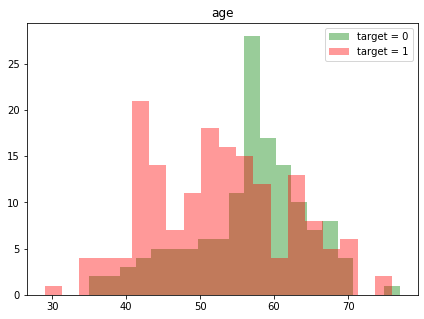

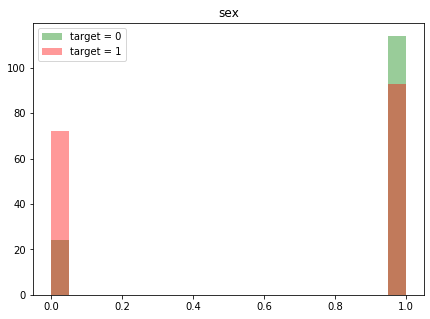

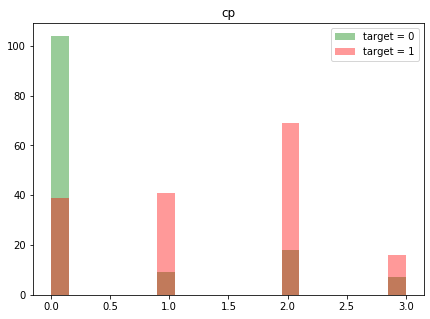

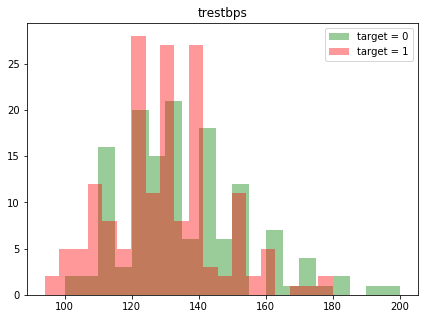

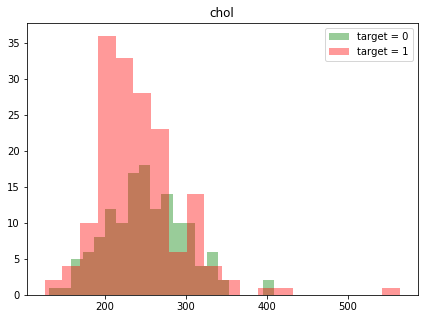

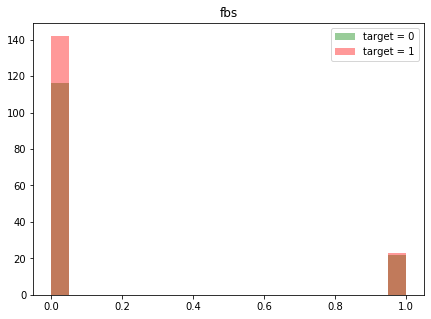

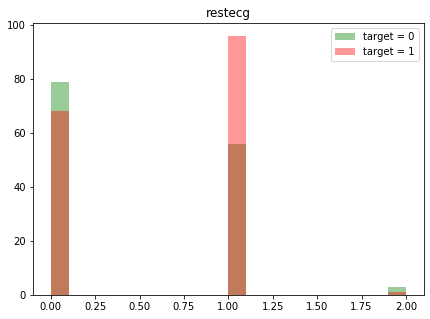

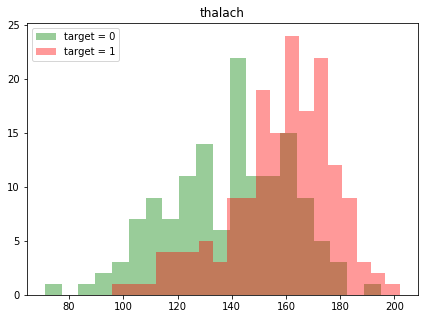

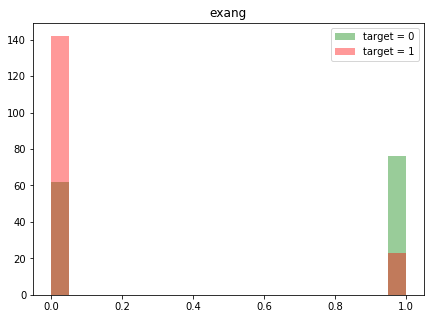

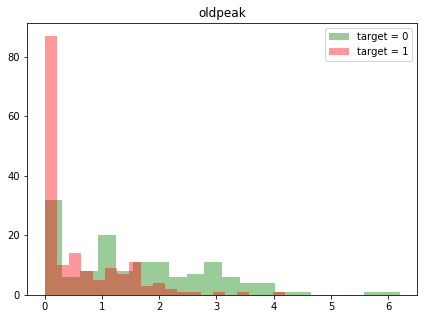

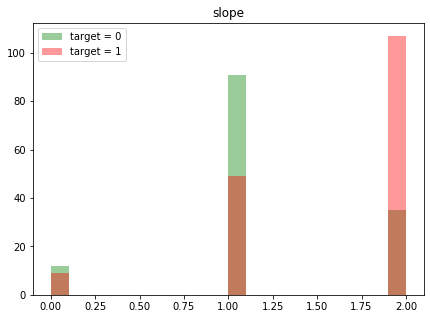

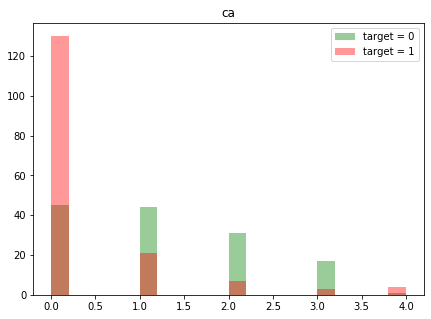

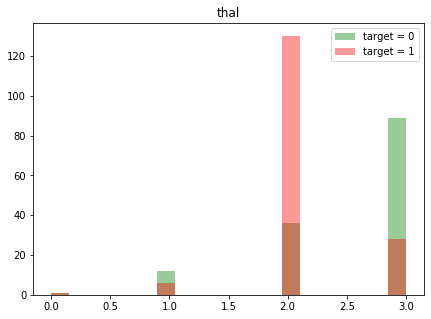

In [33]:
right = original_data.loc[original_data['target'] == 0]
ill = original_data.loc[original_data['target'] == 1]

for feature in original_data.columns[:-1]:
    plt.figure(figsize=(7,5))
    sns.distplot(right[[feature]], hist=True, rug=False, kde=False, bins=20, label='target = 0', color='green')
    sns.distplot(ill[[feature]], hist=True, rug=False, kde=False, bins=20, label='target = 1', color='red')
    plt.title(feature)
    plt.legend()